In [42]:
import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
# Libraries for constructing Pipelines
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

# Library for Normalization of Numerical Data
from scipy.stats import zscore

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import pandas as pd
pwd = os.getcwd()
print(pwd)

C:\Users\user


In [3]:
df = pd.read_csv('German Data.csv')


In [4]:
df.columns # Heading name's will appear

Index(['Index', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Default'],
      dtype='object')

In [5]:
df.head() # First 5 rows will displayed from the data frame

,Index,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


# Data Cleaning

In [6]:
df['Default'].value_counts()

Default
good    700
bad     300
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Index             1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Default           1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


# Removing NaN's from 'Saving accounts' and 'Checking account' column

In [8]:
df['Saving accounts'] = df['Saving accounts'].fillna(value = 'NA')

In [9]:
print(df['Saving accounts'].value_counts())

Saving accounts
little        603
NA            183
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64


In [10]:
df['Checking account'] = df['Checking account'].fillna(value = 'NA')

In [11]:
print(df['Checking account'].value_counts())

Checking account
NA          394
little      274
moderate    269
rich         63
Name: count, dtype: int64


# EDA

In [12]:
# Univariate Analysis

In [13]:
df.describe()

,Index,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


<Axes: xlabel='Sex', ylabel='count'>

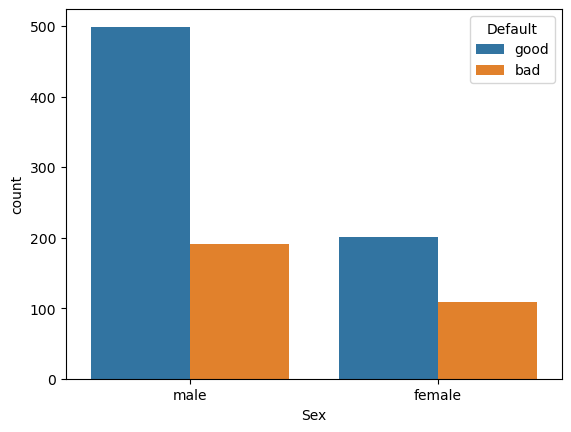

In [14]:
sns.countplot(x= 'Sex', data = df, hue= 'Default')

<Axes: xlabel='Job', ylabel='count'>

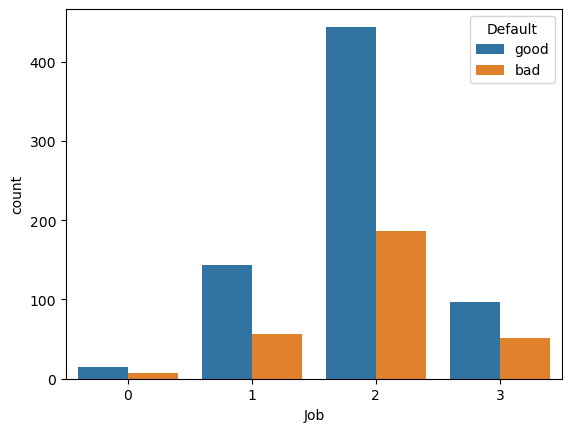

In [15]:
sns.countplot(x= 'Job', data = df, hue= 'Default')

<Axes: xlabel='Housing', ylabel='count'>

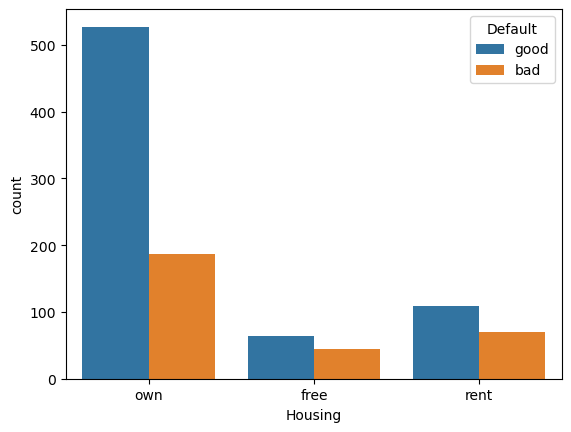

In [16]:
sns.countplot(x= 'Housing', data = df, hue= 'Default')

<Axes: xlabel='Saving accounts', ylabel='count'>

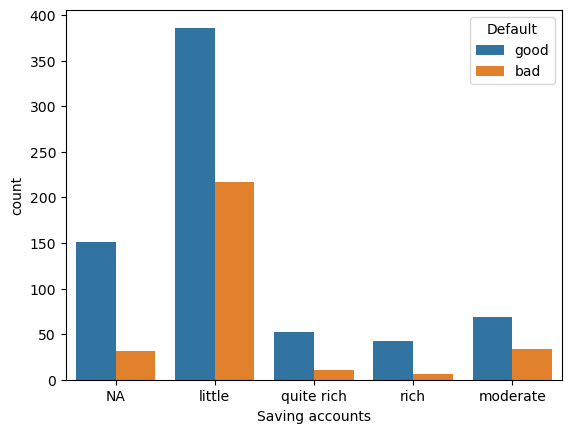

In [17]:
sns.countplot(x= 'Saving accounts', data = df, hue= 'Default')

<Axes: xlabel='Checking account', ylabel='count'>

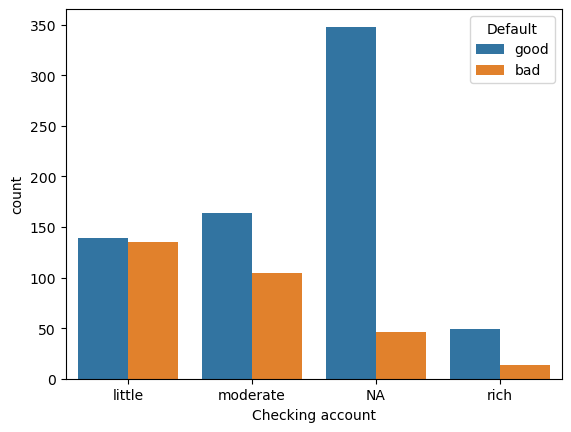

In [18]:
sns.countplot(x= 'Checking account', data = df, hue= 'Default')

 # Feature Engineering

Based on the inference of 'Savings Account' and 'Checking Account' we can club the columns into 3 categories :
'Little'
'Moderate'
'Other'

In [19]:
print("\nLittle Income :\n",df[df['Checking account'] == 'little']['Default'].value_counts().to_frame())
print("\nModerate Income :\n",df[df['Checking account'] == 'moderate']['Default'].value_counts().to_frame())


Little Income :
          count
Default       
good       139
bad        135

Moderate Income :
          count
Default       
good       164
bad        105


# Based on the inference of 'Savings Account' and 'Checking Account' we can club the columns into 3 categories :
'Little'
'Moderate'
'Other'

In [20]:
# 'Saving Account'

df['Saving accounts']= df['Saving accounts'].map({'little': 'little', 'moderate': 'moderate', 'quite rich':'other'})

In [21]:
print(df['Saving accounts'].value_counts())

Saving accounts
little      603
moderate    103
other        63
Name: count, dtype: int64


In [22]:
# 'Checking Account'
df['Checking account']= df['Checking account'].map({'little': 'little', 'moderate': 'moderate','rich':'other', 'NA':'other'})

In [23]:
print(df['Checking account'].value_counts())

Checking account
other       457
little      274
moderate    269
Name: count, dtype: int64


In [24]:
# 'Checking Account'
df['Checking account']= df['Checking account'].map({'little': 'little', 'moderate': 'moderate','rich':'other', 'NA':'other' })

In [25]:
## LabeEncoding the Purpose column
le = LabelEncoder()
df['Purpose'] = le.fit_transform(df['Purpose'])

In [26]:
print("The various purposes are: ", le.classes_.tolist(), "\nAnd the hot encoded numbers for the same are", df['Purpose'].unique().tolist())

The various purposes are:  ['business', 'car', 'domestic appliances', 'education', 'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'] 
And the hot encoded numbers for the same are [5, 3, 4, 1, 0, 2, 6, 7]


 # Data Processing
5.1 Data Preparation

In [27]:
df['Default'] = df['Default'].map({'good': 0, 'bad': 1})

In [28]:
df['Default'].value_counts()

Default
0    700
1    300
Name: count, dtype: int64

# Upsampling Minority

In [29]:
from sklearn.utils import resample

In [30]:
df_majority = df[df.Default == 0]
df_minority = df[df.Default == 1]


In [31]:
df_minority_upsampled = resample(df_minority, replace = True, n_samples =  600, random_state = 666)

## Combine classes

df_upscaled = pd.concat([df_majority, df_minority_upsampled])

In [32]:
df_upscaled.Default.value_counts()

Default
0    700
1    600
Name: count, dtype: int64

In [33]:
x= df_upscaled[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose']]
y = df_upscaled['Default']

In [34]:
# Creating a copy to avoid corruption of Data.
x1 = x.copy()

In [43]:
# List to store Categorical Columns
cat_cols = list(x1.columns[x1.dtypes == 'object'])
print("Categorical Columns: ",cat_cols)

# List to store Numerical Columns
num_cols = list(x1.columns[x1.dtypes != 'object'])
print("\nNumerical Columns:" ,num_cols)

## One-Hot Encoding Categorical Columns
x1_dummy =  pd.get_dummies(x1[cat_cols], drop_first=True)

## Joining New dummified and Numerical columns
x_new = pd.concat([x1_dummy, x1[num_cols]], axis=1, join='inner')

#### Normalizing the Dataset
ss = StandardScaler()

x_normal = ss.fit_transform(x_new)

Categorical Columns:  ['Sex', 'Housing', 'Saving accounts', 'Checking account']

Numerical Columns: ['Age', 'Job', 'Credit amount', 'Duration', 'Purpose']


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

# Dividing the Data into 'Train', 'Validation' and 'Test' Sets.

In [46]:
SEED = 666


In [55]:

x_int, x_test, y_int, y_test = train_test_split(x_normal, y, test_size=100, stratify=y, random_state = SEED)

NameError: name 'x_normal' is not defined

In [49]:
x_train,x_val,y_train,y_val = train_test_split(x_int, y_int, test_size=100, stratify = y_int, random_state = SEED)

NameError: name 'x_int' is not defined